In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [72]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [73]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [74]:
class_names[y_train[0]]

'Coat'

In [75]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
X_test.shape

(10000, 28, 28)

In [77]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [78]:
model.summary()
#None represents the batch size, meaning the model can accept any number of images at once.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.layers
#<Flatten name=flatten_1, built=True>:

#<Flatten ...>: This confirms the layer is a Flatten layer.

#name=flatten_1: Keras automatically assigns a unique name to each layer. If you don't provide a name, it uses the layer type plus an index (e.g., flatten_1, dense_1, dense_2, etc.).

#built=True: This is important. It means the layer has successfully figured out its input shape and output shape and has initialized its internal weights (if it has any). Once a layer is "built," it is ready to receive data.

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [46]:
hidden1 = model.layers[1] #extract th elayer 
hidden1.name


'dense_3'

In [47]:
model.get_layer('dense_3') is hidden1
# extract the elayer  : model.get_layer('dense_3')

True

In [48]:
hidden0 = model.layers[0]
hidden0.name

'flatten_1'

In [56]:
hidden2 = model.layers[2]
hidden2.name

'dense_4'

In [50]:
weights, biases = hidden1.get_weights()
weights 

array([[-0.03052557, -0.05234595,  0.06239291, ...,  0.02711853,
        -0.02007159,  0.01486982],
       [ 0.05172351,  0.01414981, -0.05427164, ..., -0.03955332,
         0.02609605, -0.02899765],
       [-0.06550043, -0.03012826,  0.04311945, ...,  0.03148595,
         0.0276246 ,  0.04849195],
       ...,
       [-0.03571772, -0.05896783, -0.0542574 , ...,  0.01479664,
        -0.06393161, -0.03838873],
       [-0.03691746,  0.01400013, -0.00390831, ...,  0.00083867,
        -0.07289566,  0.05896536],
       [ 0.0721955 , -0.00246838, -0.01134101, ..., -0.01313093,
         0.05993129, -0.0322215 ]], shape=(784, 300), dtype=float32)

In [57]:
weights, biases = hidden2.get_weights()
weights 

array([[-0.00046373,  0.11138017,  0.10483614, ...,  0.00421125,
         0.06283849,  0.10484108],
       [ 0.11565834,  0.05829509, -0.05270404, ...,  0.00332076,
         0.03388276, -0.06433903],
       [ 0.01029923, -0.11772975,  0.05308387, ...,  0.06928644,
         0.12095023,  0.00864214],
       ...,
       [-0.11673139, -0.03881225, -0.07239939, ..., -0.0076694 ,
         0.06425605, -0.06129693],
       [-0.07620348, -0.11556569, -0.09162927, ...,  0.03946614,
         0.0083267 , -0.03234757],
       [ 0.04268902, -0.04682913,  0.00251396, ...,  0.06812156,
        -0.05571552,  0.04526819]], shape=(300, 100), dtype=float32)

In [52]:
biases.shape

(300,)

Compiling the model 

In [79]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

Training and evaluating the model


In [81]:

history = model.fit(X_train, y_train, epochs=30,
                
validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7655 - loss: 0.7189 - val_accuracy: 0.8270 - val_loss: 0.5074
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8288 - loss: 0.4903 - val_accuracy: 0.8342 - val_loss: 0.4700
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8444 - loss: 0.4445 - val_accuracy: 0.8454 - val_loss: 0.4471
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8555 - loss: 0.4161 - val_accuracy: 0.8622 - val_loss: 0.3890
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8611 - loss: 0.3975 - val_accuracy: 0.8650 - val_loss: 0.3875
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8667 - loss: 0.3796 - val_accuracy: 0.8600 - val_loss: 0.3969
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8703 - loss: 0.3676 - val_accuracy: 0.8510 - val_loss: 0.4186
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8737 - loss: 0.3551 -

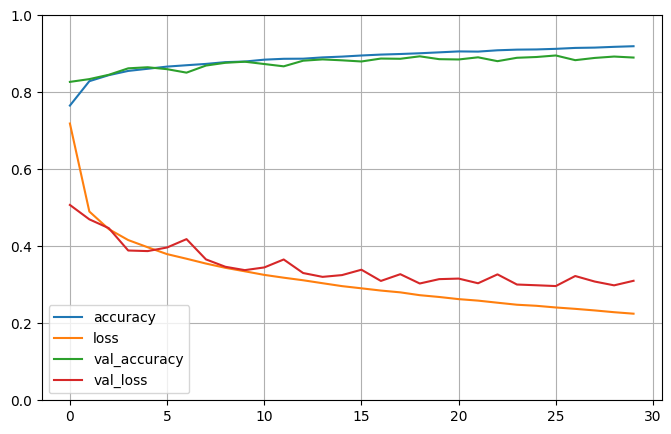

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [60]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [84]:
# Scale the test set
X_test = X_test / 255.0

# Now evaluate
model.evaluate(X_test, y_test)
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3453
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3453 


[0.3452727198600769, 0.8762000203132629]

In [89]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [87]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [90]:
import numpy as np

y_proba = model.predict(X_new)

y_pred = np.argmax(y_proba, axis=-1)

print(y_pred)

print(np.array(class_names)[y_pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


<!-- Paste this into a Jupyter Markdown cell -->
<div style="display:flex;justify-content:center;padding:8px;">
  <div style="max-width:900px;width:100%;text-align:center;padding:20px;border-radius:14px;
              box-shadow: 0 6px 22px rgba(0,0,0,0.10);backdrop-filter: blur(4px);
              border: 1px solid rgba(0,0,0,0.04);">
    <h1 style="margin:0;font-family:-apple-system,BlinkMacSystemFont,'Segoe UI',Roboto,'Helvetica Neue',Arial;
               font-size:1.9rem;line-height:1.1;
               background: linear-gradient(90deg,#2b6cb0,#805ad5);
               -webkit-background-clip: text;background-clip: text;color:transparent;">
      Building a Regression MLP Using the Sequential API
    </h1>
    <p style="margin:8px 0 0;font-family:system-ui, Arial, sans-serif;color:#475569;font-size:0.98rem;">
      Building a Regression MLP Using the Sequential API
    </p>
    <hr style="width:40px;margin:14px auto;border:none;height:3px;border-radius:3px;background:linear-gradient(90deg,#2b6cb0,#805ad5, #2b6cb0);opacity:0.9;">
    
  </div>
</div>


In [91]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [93]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7340 - val_loss: 0.5243
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4462 - val_loss: 0.4524
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4041 - val_loss: 0.4088
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3859 - val_loss: 0.3883
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3750 - val_loss: 0.4110
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3689 - val_loss: 0.3789
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3632 - val_loss: 0.3736
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3599 - val_loss: 0.3932
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3573 - val_loss: 0.3703
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3557 - val_loss: 0.3673
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3527 - val_loss: 0.3643
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

<!-- Paste this into a Jupyter Markdown cell -->
<div style="display:flex;justify-content:center;padding:8px;">
  <div style="max-width:900px;width:100%;text-align:center;padding:20px;border-radius:14px;
              box-shadow: 0 6px 22px rgba(0,0,0,0.10);backdrop-filter: blur(4px);
              border: 1px solid rgba(0,0,0,0.04);">
    <h1 style="margin:0;font-family:-apple-system,BlinkMacSystemFont,'Segoe UI',Roboto,'Helvetica Neue',Arial;
               font-size:1.9rem;line-height:1.1;
               background: linear-gradient(90deg,#2b6cb0,#805ad5);
               -webkit-background-clip: text;background-clip: text;color:transparent;">
      Building a Regression MLP Using the Sequential API
    </h1>
    <p style="margin:8px 0 0;font-family:system-ui, Arial, sans-serif;color:#475569;font-size:0.98rem;">
Building Complex Models Using the Functional API
    </p>
    <hr style="width:40px;margin:14px auto;border:none;height:3px;border-radius:3px;background:linear-gradient(90deg,#2b6cb0,#805ad5, #2b6cb0);opacity:0.9;">
    
  </div>
</div>


In [96]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [97]:

model.compile(loss="mean_squared_error", optimizer="sgd")


history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test}")

X_new = X_test[:3]
y_pred = model.predict(X_new)

print("\nPredictions (Estimated Prices):")
print(y_pred)

print("\nActual Values (Real Prices):")
print(y_test[:3])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6533 - val_loss: 0.4489
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4554 - val_loss: 0.4274
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4035 - val_loss: 0.3833
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3788 - val_loss: 0.3677
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3680 - val_loss: 0.3941
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3608 - val_loss: 0.3811
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3567 - val_loss: 0.3624
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3488 - val_loss: 0.4083
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3460 - val_loss: 0.3786
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3407 - val_loss: 0.3425
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3363 - val_loss: 0.3422
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [98]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [100]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9002 - val_loss: 1.2399
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7717 - val_loss: 0.7417
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6591 - val_loss: 0.6513
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6080 - val_loss: 0.6042
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5716 - val_loss: 0.5723
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5431 - val_loss: 0.5436
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5197 - val_loss: 0.5226
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5005 - val_loss: 0.5071
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4849 - val_loss: 0.4946
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4720 - val_loss: 0.4847
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4611 - val_loss: 0.4751
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

multiple output 

In [111]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [103]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 1.5510 - loss: 0.6864 - main_output_loss: 0.5901 - val_aux_output_loss: 1.5520 - val_loss: 0.6284 - val_main_output_loss: 0.5260
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.8860 - loss: 0.4868 - main_output_loss: 0.4424 - val_aux_output_loss: 1.0181 - val_loss: 0.5049 - val_main_output_loss: 0.4481
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.7489 - loss: 0.4493 - main_output_loss: 0.4159 - val_aux_output_loss: 0.8578 - val_loss: 0.4937 - val_main_output_loss: 0.4535
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 0.6579 - loss: 0.4313 - main_output_loss: 0.4062 - val_aux_output_loss: 0.7770 - val_loss: 0.5007 - val_main_output_loss: 0.4703
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.6142 - loss: 0.4220 - main_output_loss: 0.4007 - val_aux_output_loss: 0.7333 - val_loss: 0.4658 - val_main_output_loss: 0.4363


In [104]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])
#
#$$Total\_Loss = (0.9 \times 1.2416) + (0.1 \times 2.1149)$$== 1.3339 
#
#
#

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 2.1149 - loss: 1.3339 - main_output_loss: 1.2416  


In [105]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


In [107]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# instantiate the model
model = WideAndDeepModel()


In [108]:
model.save("my_keras_model.h5")

Save the model Using Callbacks

In [109]:
model

<WideAndDeepModel name=wide_and_deep_model_1, built=False>

In [117]:
# 1. Compile the Model AGAIN
# (This resets the graph so TensorFlow doesn't crash)
model.compile(
    loss=["mse", "mse"], 
    loss_weights=[0.8, 0.2], 
    optimizer="sgd"
)

# 2. Define the Checkpoint Callback
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5", 
    save_best_only=True
)

# 3. Train the model
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], 
    epochs=20, 
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[checkpoint_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.3890 - loss: 0.3071 - main_output_loss: 0.2979 - val_aux_output_loss: 0.4434 - val_loss: 0.3545 - val_main_output_loss: 0.3447
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3894 - loss: 0.3071 - main_output_loss: 0.2979 - val_aux_output_loss: 0.4463 - val_loss: 0.3507 - val_main_output_loss: 0.3402
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3880 - loss: 0.3059 - main_output_loss: 0.2967 - val_aux_output_loss: 0.4287 - val_loss: 0.3295 - val_main_output_loss: 0.3185
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3860 - loss: 0.3047 - main_output_loss: 0.2956 - val_aux_output_loss: 0.4226 - val_loss: 0.3302 - val_main_output_loss: 0.3200
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3869 - loss: 0.3069 - main_output_loss: 0.2981 - val_aux_output_loss: 0.4279 - val_loss: 0.3411 - val_main_output_loss: 0.3315


In [123]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,#after the best epoch in the training add 10 other epoch but at the end it  store the best epoch  
    restore_best_weights=True
)

history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=100,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3612 - loss: 0.2908 - main_output_loss: 0.2830 - val_aux_output_loss: 0.4290 - val_loss: 0.3896 - val_main_output_loss: 0.3852
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.3608 - loss: 0.2946 - main_output_loss: 0.2872 - val_aux_output_loss: 0.3988 - val_loss: 0.3189 - val_main_output_loss: 0.3101
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.3629 - loss: 0.3036 - main_output_loss: 0.2970 - val_aux_output_loss: 0.3839 - val_loss: 0.3107 - val_main_output_loss: 0.3026
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.3655 - loss: 0.3041 - main_output_loss: 0.2973 - val_aux_output_loss: 0.3953 - val_loss: 0.3126 - val_main_output_loss: 0.3035
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.3609 - loss: 0.2932 - main_output_loss: 0.2857 - val_aux_output_loss: 0.4138 - val_loss: 0.3483 - val_main_output_loss: 0.

In [ ]:
import os
import time
from tensorflow import keras  

# Define the root log directory
root_logdir = os.path.join(os.curdir, "my_logs")

# Function to get a unique run directory
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() 

# Create TensorBoard callback
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)